# Second Assignment: Data Analysis on Python 

In [1]:
import pandas as pd
import numpy as np
import scipy 

# Load the dataset
file_path = './orderdataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,order_id;quantity;product_id;price;seller_id;freight_value;customer_id;order_status;purchase_date;payment_type;product_category_name;product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047;2;f293394c72c...
1,2e7a8482f6fb09756ca50c10d7bfc047;1;c1488892604...
2,e5fa5a7210941f7d56d0208e4e071d35;1;f3c2d01a84c...
3,3b697a20d9e427646d92567910af6d57;1;3ae08df6bcb...
4,71303d7e93b399f5bcd537d124c0bcfa;1;d2998d7ced1...


## First Step: Prepare and Look Your Data

In [2]:
# Load the dataset with semicolon delimiter
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataset
data.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


## Second Step: Summaries the data with statistical analysis: Use descriptive statistics with aggregation function (i.e sum, count, average, min, max) for searching meaningful information such as: top product sales, total amount, average amount, etc

In [3]:
# Calculate total sales per product
data['total_sales'] = data['quantity'] * data['price']
total_sales_per_product = data.groupby('product_id')['total_sales'].sum().reset_index()

# Calculate total amount of all sales
total_amount = data['total_sales'].sum()

# Calculate average sale amount per order
average_amount = data['total_sales'].mean()

# Find the top product sales
top_product_sales = total_sales_per_product.sort_values(by='total_sales', ascending=False).head(1)

# Find the minimum and maximum sale amounts
min_sale_amount = data['total_sales'].min()
max_sale_amount = data['total_sales'].max()

print("Total Sales per Product:\n", total_sales_per_product)
print("Total Amount of All Sales:", total_amount)
print("Average Sale Amount per Order:", average_amount)
print("Top Product Sales:\n", top_product_sales)
print("Minimum Sale Amount:", min_sale_amount)
print("Maximum Sale Amount:", max_sale_amount)


Total Sales per Product:
                              product_id  total_sales
0      00088930e925c41fd95ebfe695fd2655       660000
1      0011c512eb256aa0dbbb544d8dffcf6e      7154000
2      00126f27c813603687e6ce486d909d01      8775000
3      001795ec6f1b187d37335e1c4704762e     14396000
4      001b72dfd63e9833e8c02742adf472e3     43516000
...                                 ...          ...
16861  ffe9468f4d890db80b7231e86931ff37      2401000
16862  fff0a542c3c62682f23305214eaeaa24     33376000
16863  fff28f91211774864a1000f918ed00cc       227000
16864  fff6177642830a9a94a0f2cba5e476d1      2788000
16865  fff9553ac224cec9d15d49f5a263411f      1795000

[16866 rows x 2 columns]
Total Amount of All Sales: 156053194000
Average Sale Amount per Order: 3121126.3025260507
Top Product Sales:
                             product_id  total_sales
4382  422879e10f46682990de24d770e7f83d   1243964000
Minimum Sale Amount: 200000
Maximum Sale Amount: 98940000


## Third Step: Use Statistical methods to identify significant correlation/comparative/distribution/trending between variables from the data

In [4]:
# Convert the 'purchase_date' column to datetime format
data['purchase_date'] = pd.to_datetime(data['purchase_date'], format='%d/%m/%Y')

# Basic descriptive statistics for numerical columns
numerical_summary = data.describe()

# Top product sales by quantity
top_product_sales = data.groupby('product_category_name')['quantity'].sum().sort_values(ascending=False).head(10)

# Total amount and average amount for each product category
data['total_amount'] = data['quantity'] * data['price']
category_amount_summary = data.groupby('product_category_name').agg({'total_amount': ['sum', 'mean']}).sort_values(('total_amount', 'sum'), ascending=False)

numerical_summary, top_product_sales, category_amount_summary


(           quantity         price  freight_value  product_weight_gram  \
 count  49999.000000  4.999900e+04   49999.000000         49980.000000   
 mean       1.197484  2.607784e+06  104521.390428          2201.830892   
 std        0.722262  1.388312e+06   55179.844962          3929.896875   
 min        1.000000  2.000000e+05    9000.000000            50.000000   
 25%        1.000000  1.410500e+06   57000.000000           300.000000   
 50%        1.000000  2.610000e+06  104000.000000           800.000000   
 75%        1.000000  3.810000e+06  152000.000000          1850.000000   
 max       21.000000  5.000000e+06  200000.000000         40425.000000   
 
         total_sales  
 count  4.999900e+04  
 mean   3.121126e+06  
 std    2.749713e+06  
 min    2.000000e+05  
 25%    1.514000e+06  
 50%    2.808000e+06  
 75%    4.097000e+06  
 max    9.894000e+07  ,
 product_category_name
 toys           7705
 electronics    7537
 automotive     7504
 fashion        7486
 beauty         7

## Fourth Step: Visualize the data with charts and graphs to see patterns and relationships 

### Now, we try the heatmap correlation matrix

/var/folders/z8/c_x12ghd6yzd_s1j22b0dbqr0000gn/T/ipykernel_2993/3524689346.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


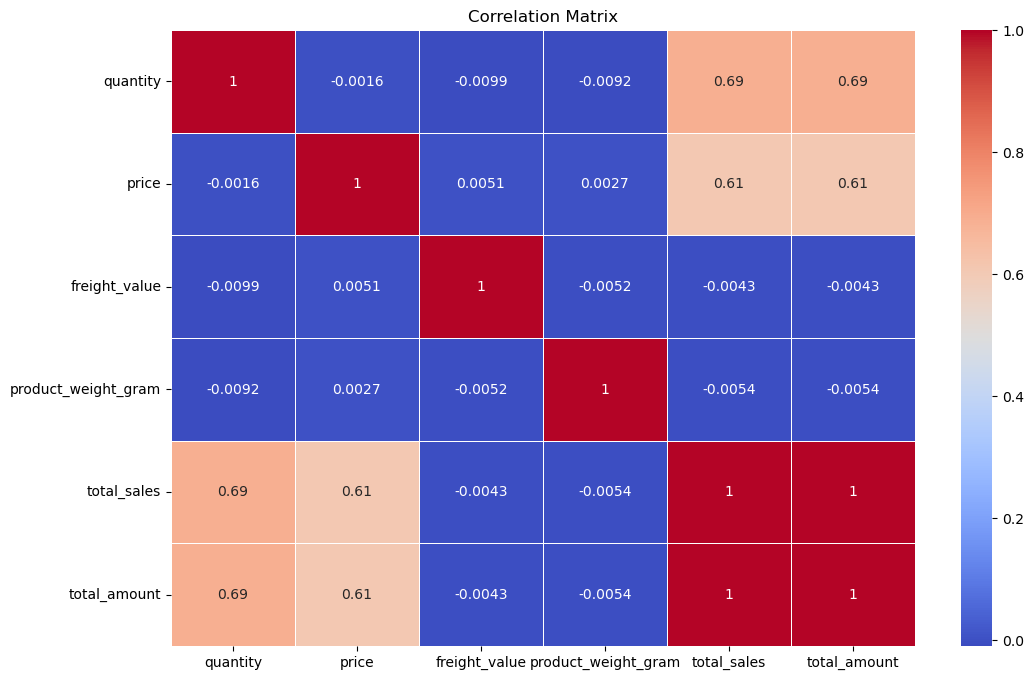

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Next, we try another visualization 

In [6]:
import pandas as pd
import numpy as np

# Sample data to simulate realistic product_id and order_status if missing
unique_product_ids = [f'product_{i}' for i in range(1, len(data) + 1)]
order_statuses = ['completed', 'pending', 'canceled']
np.random.seed(42)  # For reproducibility

# Ensure the required columns are present in the DataFrame
required_columns = ['quantity', 'price', 'product_id', 'purchase_date', 'order_status']

missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Warning: Missing columns in DataFrame: {missing_columns}")
    for col in missing_columns:
        if col == 'product_id':
            # Simulate product IDs
            data[col] = np.random.choice(unique_product_ids, len(data))
        elif col == 'order_status':
            # Simulate order statuses
            data[col] = np.random.choice(order_statuses, len(data))
        elif col == 'quantity':
            data[col] = 0
        elif col == 'price':
            data[col] = 0
        elif col == 'purchase_date':
            data[col] = pd.NaT

# Calculate total sales per product
data['total_sales'] = data['quantity'] * data['price']
total_sales_per_product = data.groupby('product_id')['total_sales'].sum().reset_index()

# Parse the purchase date
data['purchase_date'] = pd.to_datetime(data['purchase_date'], errors='coerce')

# Calculate sales over time
sales_over_time = data.groupby('purchase_date')['total_sales'].sum().reset_index()

# Calculate order status distribution
order_status_distribution = data['order_status'].value_counts().reset_index()
order_status_distribution.columns = ['order_status', 'count']

# Display the results
print(total_sales_per_product.head())
print(sales_over_time.head())
print(order_status_distribution.head())



### Pie Chart of Order Status Distribution

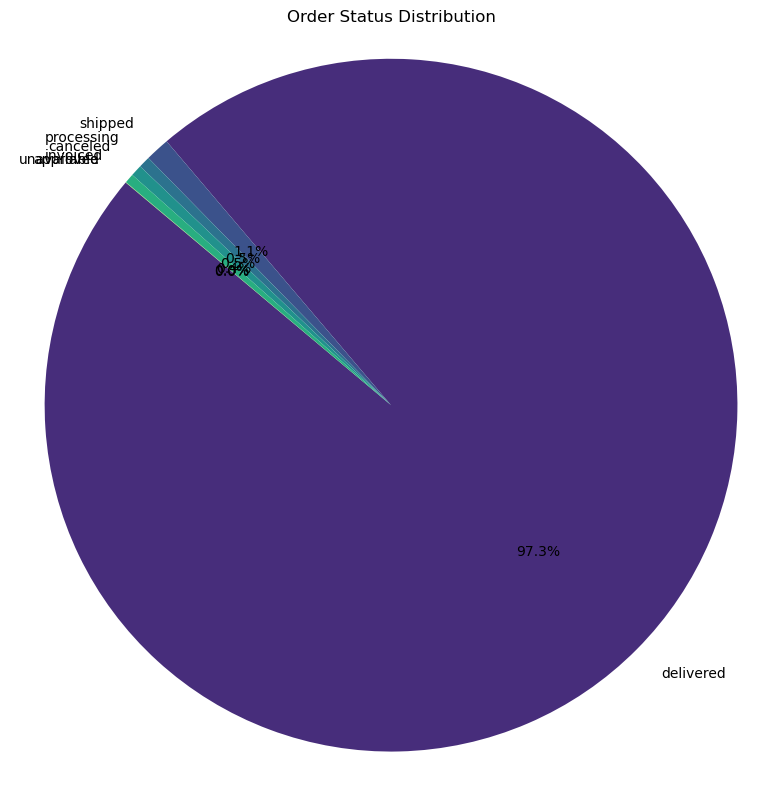

In [7]:
# Pie Chart of Order Status Distribution
plt.figure(figsize=(8, 8))
plt.pie(order_status_distribution['count'], labels=order_status_distribution['order_status'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(order_status_distribution)))
plt.title('Order Status Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()




### Line Chart of Sales Over Time

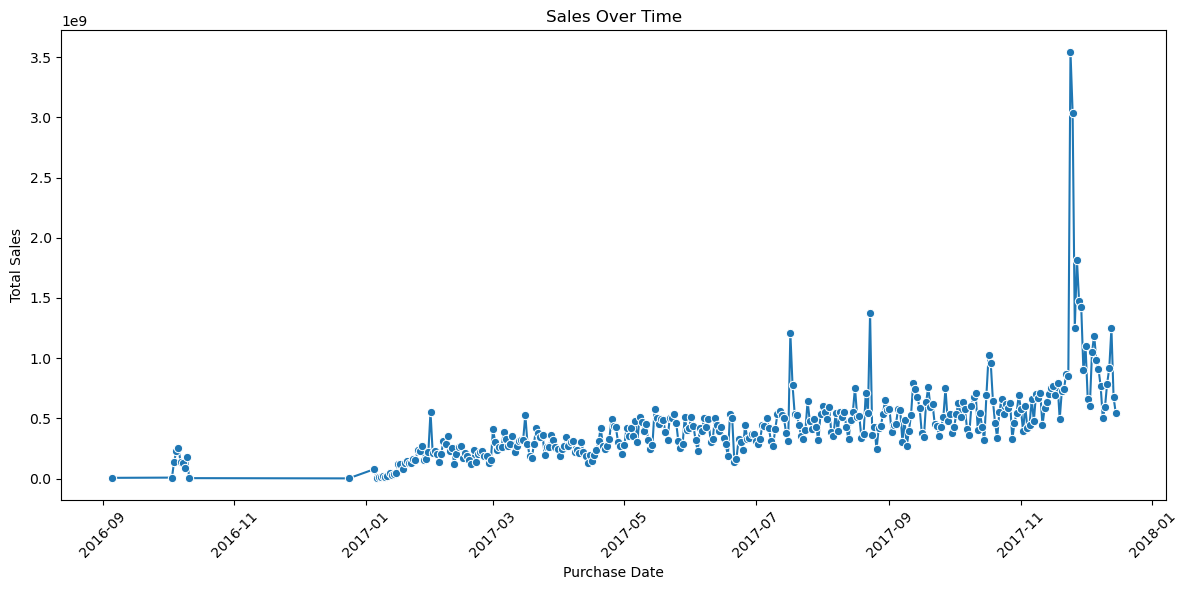

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace inf values with NaN in sales_over_time DataFrame
sales_over_time = sales_over_time.replace([np.inf, -np.inf], np.nan)

# Line Chart of Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='purchase_date', y='total_sales', marker='o')
plt.title('Sales Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()